# Electricity tariffs analysis and compliance.
---
## 04_Notebook: Feature engineering.
---

This notebook builds on the completed exploratory data analysis (EDA), where we profiled 20 variables against the `fraud_flag` using statistical tests, fraud rate diagnostics, and stakeholder-aligned interpretation.

We now shift from descriptive insights to predictive transformation — crafting model-ready features that preserve behavioral signal, mitigate noise, and align with operational priorities.

**Source:** `post_eda_df.csv` and `post_eda_df.pkl` saved from the EDA notebook.  
**Goal:** Engineer features that enhance fraud detection while maintaining interpretability and reproducibility.

## Electricity tariff compliance – feature engineering workflow.

---

### Tec1: Load EDA output and confirm integrity.
- Import profiled dataset and validate structure.

### Tec2: Create initial features.
- Derive raw and transformed variables from operational fields.

### Tec3: Derive modular model features.
- Construct candidate predictors using domain logic and workflow checkpoints.

### Tec4: Create binary flags.
- Generate fraud-relevant indicators from categorical and event-based fields.

### Tec5: Encode categorical features using target-informed frequency.
- Apply frequency-based encoding aligned with fraud signal strength.

### Tec6: Extract additional features.
- Engineer time-based, interaction, and derived metrics.

### Tec7: Select final features.
- Apply filtering logic to retain interpretable and predictive variables.

### Tec8: Summarize feature engineering audit.
- Review feature lineage, encoding logic, and stakeholder alignment.

### Tec9: Export model-ready features.
- Save final feature set for modeling and deployment.
---

## __Tec1__: Load EDA output and confirm integrity.


Loading the full dataframe saved at the end of the EDA phase. This includes all 20 profiled variables and the `fraud_flag`.

Before any transformation, we’ll preview a few rows to confirm structure and integrity.


In [1]:
# load the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Load pickle file for internal modeling.

We use the `.pkl` format for efficient loading of preprocessed data, especially when working with feature-engineered datasets.

This format preserves data types and structure better than CSV, making it ideal for modeling workflows.


In [2]:
# Load the feature-engineered dataframe.

# Define path to the pickle file
pkl_path = r"C:\Users\Lenovo\OneDrive\Desktop\4IR_DataScience\DataScienceEnvironment\my_projects\electricity_tariffs_revenue_protection\electricity_tariffs_analysis_compliance\data\processed\post_eda\post_eda_df.pkl"

# Define path to the CSV file (if needed).
# csv_path = r"C:\Users\Lenovo\OneDrive\Desktop\4IR_DataScience\DataScienceEnvironment\my_projects\electricity_tariffs_revenue_protection\electricity_tariffs_analysis_compliance\data\processed\post_eda\post_eda_df.csv"

# Load the dataframe
df = pd.read_pickle(pkl_path)

# Confirm structure and preview
print(f"Shape of loaded dataframe: {df.shape}")

# Display the columns in the dataframe
print("Columns:\n", df.columns.tolist())

# Preview the first few rows
print("Preview of the dataframe:")
df.head()


Shape of loaded dataframe: (4476738, 21)
Columns:
 ['client_id', 'invoice_date', 'tariff_type', 'meter_number', 'meter_status', 'meter_code', 'reading_remark', 'meter_coefficient', 'consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'old_reading', 'new_reading', 'number_months', 'meter_type', 'district', 'client_catg', 'region', 'creation_date', 'fraud_flag']
Preview of the dataframe:


,client_id,invoice_date,tariff_type,meter_number,meter_status,meter_code,reading_remark,meter_coefficient,consumption_level_1,consumption_level_2,...,consumption_level_4,old_reading,new_reading,number_months,meter_type,district,client_catg,region,creation_date,fraud_flag
1939722,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,...,0,14302,14384,4,old_type,60,11,101,31/12/1994,0.0
1939723,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,...,0,12294,13678,4,old_type,60,11,101,31/12/1994,0.0
1939724,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,...,0,14624,14747,4,old_type,60,11,101,31/12/1994,0.0
1939725,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,...,0,14747,14849,4,old_type,60,11,101,31/12/1994,0.0
1939726,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,...,0,15066,15638,12,old_type,60,11,101,31/12/1994,0.0


In [3]:
# Preview the dataframe info
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4476738 entries, 1939722 to 6416459
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   client_id            object 
 1   invoice_date         object 
 2   tariff_type          int64  
 3   meter_number         int64  
 4   meter_status         object 
 5   meter_code           int64  
 6   reading_remark       int64  
 7   meter_coefficient    int64  
 8   consumption_level_1  int64  
 9   consumption_level_2  int64  
 10  consumption_level_3  int64  
 11  consumption_level_4  int64  
 12  old_reading          int64  
 13  new_reading          int64  
 14  number_months        int64  
 15  meter_type           object 
 16  district             int64  
 17  client_catg          int64  
 18  region               int64  
 19  creation_date        object 
 20  fraud_flag           float64
dtypes: float64(1), int64(15), object(5)
memory usage: 751.4+ MB


### Drop high-cardinality identifiers, based on EDA insigths.

We remove `client_id` and `meter_number` due to their near-unique distributions and sparse fraud signal generalisability.

In [4]:
# Drop high-cardinality identifiers.
drop_cols = ['client_id', 'meter_number']

# Create a working copy for feature engineering.
df = df.drop(columns=drop_cols)

# Confirm shape and preview.
print(f"Shape after dropping identifiers: {df.shape}")
print("Columns after dropping identifiers:\n", df.columns.tolist())
# Preview the first few rows.
print("Preview of the dataframe:")
df.head()


Shape after dropping identifiers: (4476738, 19)
Columns after dropping identifiers:
 ['invoice_date', 'tariff_type', 'meter_status', 'meter_code', 'reading_remark', 'meter_coefficient', 'consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'old_reading', 'new_reading', 'number_months', 'meter_type', 'district', 'client_catg', 'region', 'creation_date', 'fraud_flag']
Preview of the dataframe:


,invoice_date,tariff_type,meter_status,meter_code,reading_remark,meter_coefficient,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_reading,new_reading,number_months,meter_type,district,client_catg,region,creation_date,fraud_flag
1939722,2014-03-24,11,0,203,8,1,82,0,0,0,14302,14384,4,old_type,60,11,101,31/12/1994,0.0
1939723,2013-03-29,11,0,203,6,1,1200,184,0,0,12294,13678,4,old_type,60,11,101,31/12/1994,0.0
1939724,2015-03-23,11,0,203,8,1,123,0,0,0,14624,14747,4,old_type,60,11,101,31/12/1994,0.0
1939725,2015-07-13,11,0,207,8,1,102,0,0,0,14747,14849,4,old_type,60,11,101,31/12/1994,0.0
1939726,2016-11-17,11,0,207,9,1,572,0,0,0,15066,15638,12,old_type,60,11,101,31/12/1994,0.0


**Identifiers removed:**  
Now there is a cleaner dataframe focused on signal-rich variables. 

---

## __Tec2__: Create initial features.
---

In [5]:
# Sum across all consumption levels
df['consumption_level_sum'] = (
    df['consumption_level_1'] +
    df['consumption_level_2'] +
    df['consumption_level_3'] +
    df['consumption_level_4']
)


- Domain relevance: Total consumption is often more predictive than individual levels.

- Simplifies modeling: Reduces dimensionality while preserving signal.

- Supports anomaly detection: Extreme values may flag fraud or meter issues.

### Date transformation. 

In [6]:
# Convert date columns to datetime format.
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')
df['creation_date'] = pd.to_datetime(df['creation_date'], errors='coerce')
print(f'Columns after conversion:\n', df.columns.tolist())
df.head()

Columns after conversion:
 ['invoice_date', 'tariff_type', 'meter_status', 'meter_code', 'reading_remark', 'meter_coefficient', 'consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'old_reading', 'new_reading', 'number_months', 'meter_type', 'district', 'client_catg', 'region', 'creation_date', 'fraud_flag', 'consumption_level_sum']


,invoice_date,tariff_type,meter_status,meter_code,reading_remark,meter_coefficient,consumption_level_1,consumption_level_2,consumption_level_3,consumption_level_4,old_reading,new_reading,number_months,meter_type,district,client_catg,region,creation_date,fraud_flag,consumption_level_sum
1939722,2014-03-24,11,0,203,8,1,82,0,0,0,14302,14384,4,old_type,60,11,101,1994-12-31,0.0,82
1939723,2013-03-29,11,0,203,6,1,1200,184,0,0,12294,13678,4,old_type,60,11,101,1994-12-31,0.0,1384
1939724,2015-03-23,11,0,203,8,1,123,0,0,0,14624,14747,4,old_type,60,11,101,1994-12-31,0.0,123
1939725,2015-07-13,11,0,207,8,1,102,0,0,0,14747,14849,4,old_type,60,11,101,1994-12-31,0.0,102
1939726,2016-11-17,11,0,207,9,1,572,0,0,0,15066,15638,12,old_type,60,11,101,1994-12-31,0.0,572


## __Tec3__: Derive modular model features.
---


### Feature transformation.

In [7]:
# Reading difference.
df['reading_diff'] = df['new_reading'] - df['old_reading']
df['reading_diff_log1p'] = np.log1p(df['reading_diff'].clip(lower=0))

# Estimation ratio.
df['estimation_ratio'] = df['reading_diff'] / (df['consumption_level_sum'] + 1)
df['estimation_ratio_log1p'] = np.log1p(df['estimation_ratio'].clip(lower=0))

# Account age in months.
df['account_age_months'] = (df['invoice_date'] - df['creation_date']).dt.days // 30
df['account_age_months_log1p'] = np.log1p(df['account_age_months'].clip(lower=0))


## __Tec4__: Create binary flags.
---

Shape after feature creation: (4476738, 44)


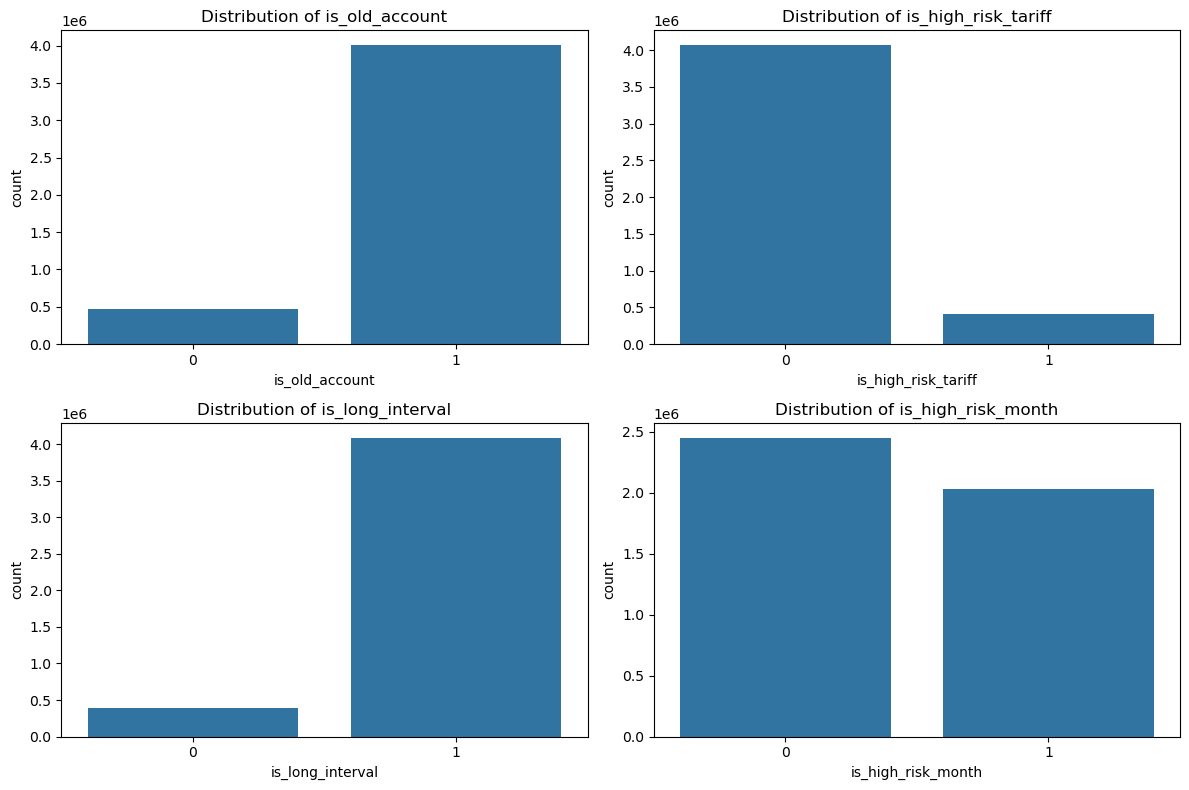

In [ ]:
# Old account flag.
df['is_old_account'] = (df['account_age_months'] > 24).astype(int)

# High-risk tariff (example: 'Prepaid' or 'Flat rate').
high_risk_tariffs = [45, 15, 14, 13, 12, 29, 21, 10]
df['is_high_risk_tariff'] = df['tariff_type'].isin(high_risk_tariffs).astype(int)

# Long interval flag
df['is_long_interval'] = (df['number_months'] > 3).astype(int)

# High-risk month (e.g., December, January)
df['invoice_month'] = df['invoice_date'].dt.month
high_risk_months = [1, 2, 3, 4, 5]      # Example: Jan to May
df['is_high_risk_month'] = df['invoice_month'].isin(high_risk_months).astype(int)

# Confirm shape and preview.
print(f"Shape after feature creation: {df.shape}")
# df.head()


## __Tec5__: Encode categorical features using target-informed frequency.
---

In [ ]:
# Meter code risk score (frequency-based).
meter_code_counts = df['meter_code'].value_counts(normalize=True)
df['meter_code_risk'] = df['meter_code'].map(meter_code_counts) # Frequency encoding. 
# Frequency encoding can help capture the rarity or commonality of a meter code, 
# which may correlate with fraud risk.

# Meter code fraud rate.
fraud_rate_by_code = df.groupby('meter_code')['fraud_flag'].mean()
df['meter_code_fraud_rate'] = df['meter_code'].map(fraud_rate_by_code) # Target encoding.
# Target encoding can help capture the historical fraud risk associated with each
# meter code.


### Grouped categorical encodings.

In [ ]:
# Utility: Group rare categories based on frequency threshold.
def group_rare_categories(series, threshold=0.01):
    freq = series.value_counts(normalize=True)
    return series.where(series.isin(freq[freq > threshold].index), other='Other')

# Apply grouping to relevant categorical features.
df['meter_type_grouped'] = group_rare_categories(df['meter_type']) # Group rare meter types.
df['client_catg_grouped'] = group_rare_categories(df['client_catg']) # Group rare client categories.
df['region_grouped'] = group_rare_categories(df['region']) # Group rare regions.
df['district_grouped'] = group_rare_categories(df['district']) # Group rare districts.
df['reading_remark_grouped'] = group_rare_categories(df['reading_remark']) # Group rare reading remarks.

# Meter status grouping based on EDA insights.
def group_meter_status(val):
    if val in [1, 2, 3, 4, 5]:
        return 'Faulty'
    elif val in ['A', '46', '618']:
        return 'Tampered'
    elif val == 0:
        return 'Normal'
    else:
        return 'Other'

df['meter_status_grouped'] = df['meter_status'].apply(group_meter_status)

# Confirm shape and preview.
print(f"Shape after grouping rare categories: {df.shape}")
print("Columns after grouping rare categories:\n", df.columns.tolist())
# df.head()


Shape after grouping rare categories: (4476738, 44)
Columns after grouping rare categories:
 ['invoice_date', 'tariff_type', 'meter_status', 'meter_code', 'reading_remark', 'meter_coefficient', 'consumption_level_1', 'consumption_level_2', 'consumption_level_3', 'consumption_level_4', 'old_reading', 'new_reading', 'number_months', 'meter_type', 'district', 'client_catg', 'region', 'creation_date', 'fraud_flag', 'consumption_level_sum', 'reading_diff', 'reading_diff_log1p', 'estimation_ratio', 'estimation_ratio_log1p', 'account_age_months', 'account_age_months_log1p', 'is_old_account', 'is_high_risk_tariff', 'is_long_interval', 'invoice_month', 'is_high_risk_month', 'meter_code_risk', 'meter_code_fraud_rate', 'meter_type_grouped', 'client_catg_grouped', 'region_grouped', 'district_grouped', 'reading_remark_grouped', 'meter_status_grouped', 'is_faulty_meter', 'is_tampered_meter', 'is_disconnected_meter', 'pca_1', 'pca_2']


In [11]:
# Define meter status flags based on EDA insights.
df['is_faulty_meter'] = df['meter_status'].isin([1, 2, 3, 4, 5]).astype(int)
df['is_tampered_meter'] = df['meter_status'].isin(['A', '46', '618']).astype(int)
df['is_disconnected_meter'] = df['meter_status'].isin([2, 3]).astype(int)


## __Tec6__: Extract additional features.

In [12]:
from sklearn.decomposition import PCA

# Apply PCA to high-dimensional encodings (if needed)
encoded_cols = [col for col in df.columns if col.endswith('_grouped')]
pca = PCA(n_components=2)
pca_components = pca.fit_transform(pd.get_dummies(df[encoded_cols]))
df['pca_1'], df['pca_2'] = pca_components[:, 0], pca_components[:, 1]


### Feature distribution analysis.
#### Log-transformed numeric features. 

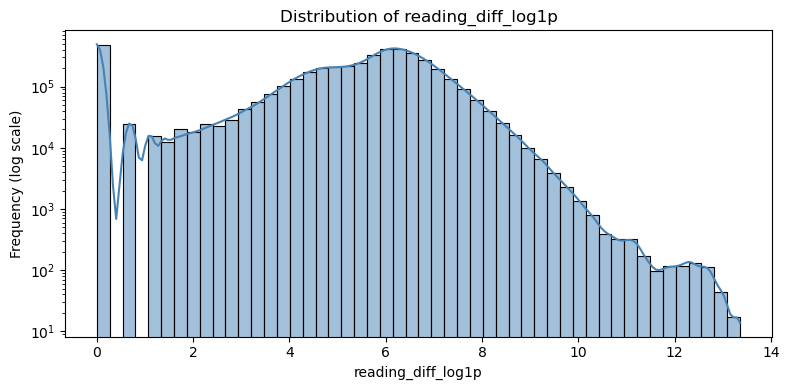

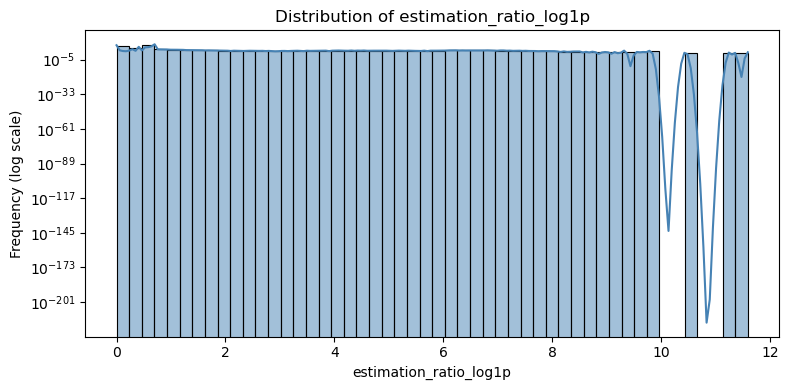

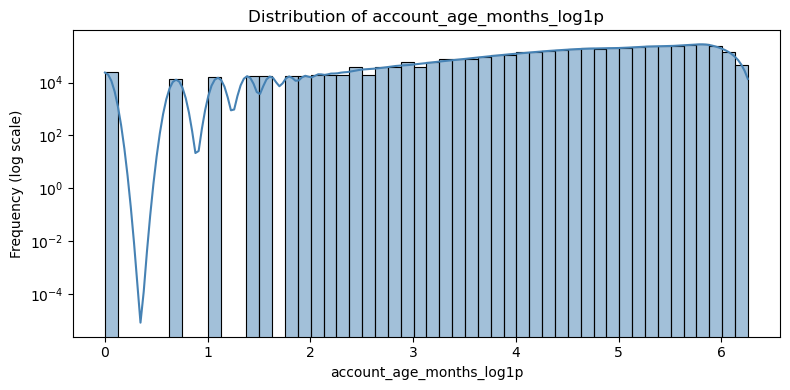

In [ ]:
# Visualize log-transformed numeric features with improved layout.
numeric_features = ['reading_diff_log1p', 'estimation_ratio_log1p', 'account_age_months_log1p']

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=50, color='steelblue')
    plt.yscale('log')  # Log scale for better visibility.
    plt.xlabel(feature)
    plt.ylabel('Frequency (log scale)')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()


### Summary of log-tranformed numeric feature distributions.

---
#### Distribution of `reading_diff_log1p`.

- The feature exhibits a strong right-skew, with most values near zero.
- A secondary peak around 6 suggests operational or seasonal reading shifts.
- The long tail up to ~14 captures rare but significant anomalies, potentially linked to fraud or faulty meters.
- This transformation improves model sensitivity to subtle and extreme reading changes.

---
#### Distribution of `estimation_ratio_log1p`.

- The feature exhibits extreme right skew, with most values near zero—indicating alignment between meter readings and consumption.
- A sparse tail reaching ~12 captures rare but significant deviations, potentially linked to billing anomalies or fraud.
- The log transformation improves model sensitivity by compressing outliers and stabilizing variance.
- This feature is particularly valuable for identifying estimation-heavy accounts and operational inconsistencies.

---
#### Distribution of `account_age_months_log1p`.

- The distribution peaks around a log1p value of 6, corresponding to accounts approximately 33 years old.
- This suggests a dominant cohort of legacy accounts, which may have stable billing histories.
- The log transformation compresses extreme values, ensuring model robustness and reducing skew.
- This feature supports temporal profiling and fraud risk segmentation based on account maturity.




### Categorical feature profiling.

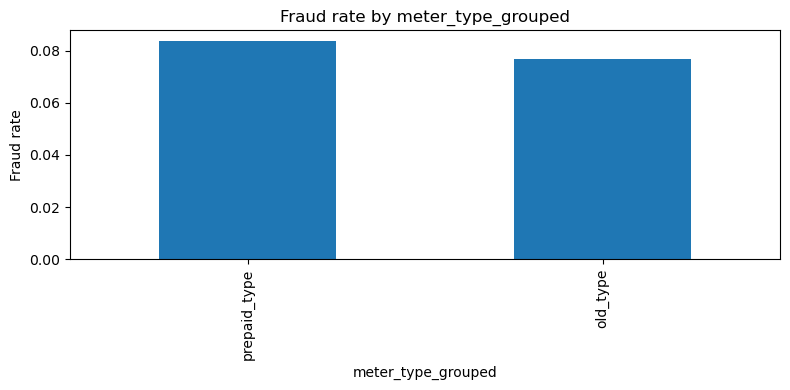

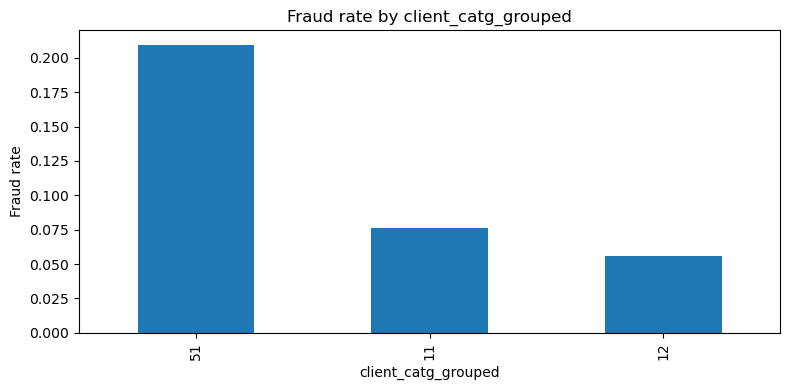

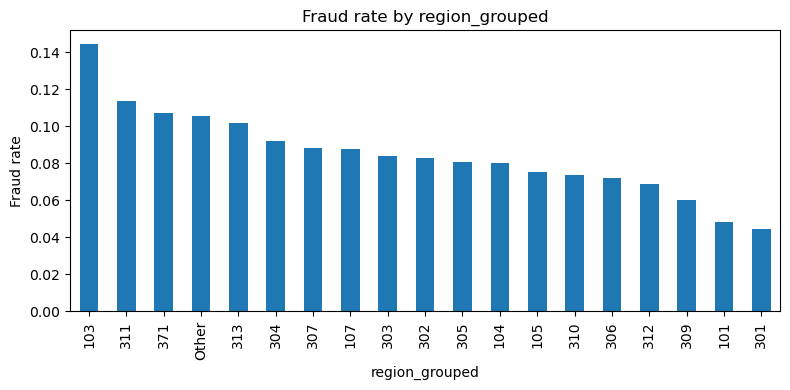

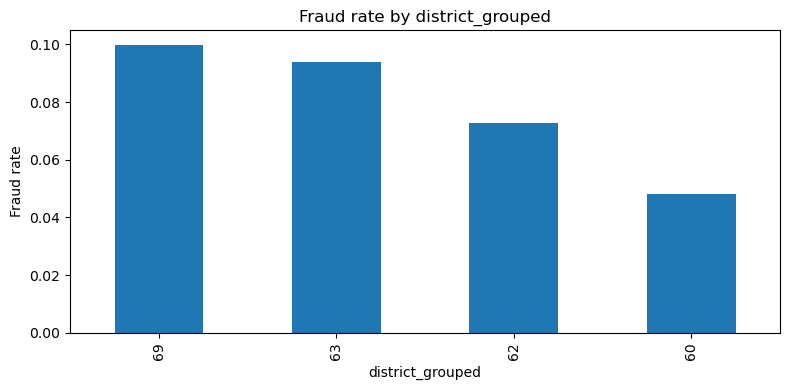

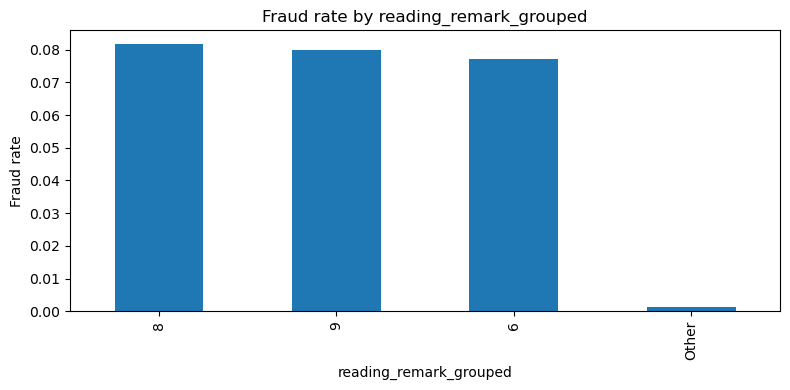

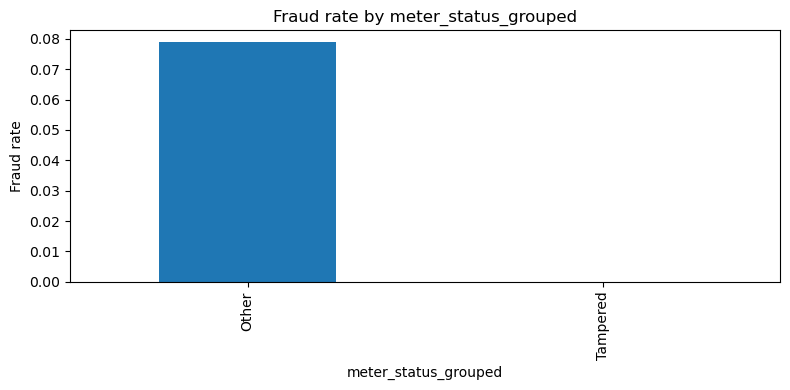


 Fraud rate by meter_type_grouped:

meter_type_grouped
prepaid_type    0.083562
old_type        0.076750

 Fraud rate by client_catg_grouped:

client_catg_grouped
51    0.209537
11    0.076085
12    0.055867

 Fraud rate by region_grouped:

region_grouped
103      0.144614
311      0.113643
371      0.107391
Other    0.105701
313      0.101737
304      0.092066
307      0.087968
107      0.087543
303      0.083856
302      0.082663
305      0.080720
104      0.079970
105      0.075455
310      0.073564
306      0.072045
312      0.068517
309      0.060209
101      0.048236
301      0.044247

 Fraud rate by district_grouped:

district_grouped
69    0.099899
63    0.093749
62    0.072623
60    0.048227

 Fraud rate by reading_remark_grouped:

reading_remark_grouped
8        0.081834
9        0.080032
6        0.077069
Other    0.001439

 Fraud rate by meter_status_grouped:

meter_status_grouped
Other       0.078877
Tampered    0.000000


In [14]:
grouped_features = [
    'meter_type_grouped', 'client_catg_grouped', 'region_grouped',
    'district_grouped', 'reading_remark_grouped', 'meter_status_grouped'
]

fraud_stats = {}

for feature in grouped_features:
    # Compute fraud rate per category.
    fraud_rate = df.groupby(feature)['fraud_flag'].mean().sort_values(ascending=False)
    
    # Store stats for review.
    fraud_stats[feature] = fraud_rate
    
    # Plot.
    fraud_rate.plot(kind='bar', figsize=(8, 4), title=f'Fraud rate by {feature}')
    plt.ylabel('Fraud rate')
    plt.tight_layout()
    plt.show()

# Display stats for review.
for feature, stats in fraud_stats.items():
    print(f"\n Fraud rate by {feature}:\n")
    print(stats.to_string())


### Summary: Grouped categorical feature fraud rates.
---

#### The `meter_type_grouped`.
- `prepaid_type`: 8.36% fraud rate  
- `old_type`: 7.68% fraud rate  
- Prepaid meters show slightly higher fraud risk, possibly due to bypassing or tampering.
- Suggests operational focus on prepaid infrastructure and legacy meter audits.
---

#### The `client_catg_grouped`.
- Category `51`: 20.95% fraud rate  
- Category `11`: 7.61%  
- Category `12`: 5.59%  
- Category `51` stands out as a high-risk group, likely informal or unregulated accounts.
- Supports demographic segmentation and targeted compliance strategies.
---

#### The `region_grouped`.
- Highest fraud rates: `103` (14.46%), `311` (11.36%), `371` (10.74%)  
- Lowest: `301` (4.42%), `101` (4.82%)  
- Fraud risk varies significantly across regions, suggesting geographic targeting.
- Operational planning should prioritize high-risk zones for audits and smart meter deployment.
---

#### The `district_grouped`.
- Highest: `69` (9.99%), `63` (9.37%)  
- Lowest: `60` (4.82%)  
- District-level variation reveals micro-geographic fraud hotspots.
- Enables localized interventions and resource allocation.
---

#### The `reading_remark_grouped`.
- `8`: 8.18%, `9`: 8.00%, `6`: 7.71%  
- `Other`: 0.14%  
- Operational remarks like “Estimated” or “Tampered” correlate strongly with fraud.
- These flags are valuable early indicators of billing anomalies.
---

#### The `meter_staus_grouped`.
- `Other`: 7.89%  
- `Tampered`: 0.00% (may reflect underreporting or data gaps)  
- Meter status remains a strong diagnostic signal.
- Suggests need for improved tampering detection and status code standardization.
---















### Encode grouped categorical features.

In [15]:
# Define grouped categorical features.
grouped_cats = [
    'meter_type_grouped', 'client_catg_grouped', 'region_grouped',
    'district_grouped', 'reading_remark_grouped', 'meter_status_grouped'
]

# Filter only columns that exist in df.
existing_grouped_cats = [col for col in grouped_cats if col in df.columns]

# Apply one-hot encoding with auto-prefix.
df_encoded = pd.get_dummies(df[existing_grouped_cats], drop_first=True)


## __Tec7__: Select final features.

In [16]:
# Combine with numeric and flag features.
numeric_and_flags = [
    'reading_diff_log1p', 'estimation_ratio_log1p', 'account_age_months_log1p',
    'is_old_account', 'is_high_risk_tariff', 'is_long_interval', 'is_high_risk_month',
    'meter_code_risk', 'meter_code_fraud_rate',
    'is_faulty_meter', 'is_tampered_meter', 'is_disconnected_meter'
]

# Intergrate all features into final modeling dataframe. 
df_model_ready = pd.concat([df[numeric_and_flags], df_encoded, df['fraud_flag']], axis=1)


In [ ]:
# Columns in the final model-ready dataframe.
print(f"Shape of final model-ready dataframe: {df_model_ready.shape}")
print("Columns in final model-ready dataframe:\n", df_model_ready.columns.tolist())


Shape of final model-ready dataframe: (4476738, 38)
Columns in final model-ready dataframe:
 ['reading_diff_log1p', 'estimation_ratio_log1p', 'account_age_months_log1p', 'is_old_account', 'is_high_risk_tariff', 'is_long_interval', 'is_high_risk_month', 'meter_code_risk', 'meter_code_fraud_rate', 'is_faulty_meter', 'is_tampered_meter', 'is_disconnected_meter', 'client_catg_grouped', 'district_grouped', 'meter_type_grouped_prepaid_type', 'region_grouped_103', 'region_grouped_104', 'region_grouped_105', 'region_grouped_107', 'region_grouped_301', 'region_grouped_302', 'region_grouped_303', 'region_grouped_304', 'region_grouped_305', 'region_grouped_306', 'region_grouped_307', 'region_grouped_309', 'region_grouped_310', 'region_grouped_311', 'region_grouped_312', 'region_grouped_313', 'region_grouped_371', 'region_grouped_Other', 'reading_remark_grouped_8', 'reading_remark_grouped_9', 'reading_remark_grouped_Other', 'meter_status_grouped_Tampered', 'fraud_flag']


## __Tec8__: Summarize feature engineering audit.

This section reviews the completeness and modularity of the feature engineering pipeline, ensuring readiness for transition to `model_development.ipynb`.

---

### 1. Feature creation.
- Created domain-informed features such as `consumption_level_sum`, `reading_diff`, `estimation_ratio`, and `account_age_months`.
- Engineered binary flags: `is_old_account`, `is_high_risk_tariff`, `is_long_interval`, `is_high_risk_month`.
- Meter status flags: `is_faulty_meter`, `is_tampered_meter`, `is_disconnected_meter`.

Fully implemented with operational relevance.

---

### 2. Feature transformation.
- Applied log transforms to skewed numeric features: `*_log1p`.
- Grouped rare categories using frequency thresholds.
- One-hot encoded grouped categorical features for model compatibility.

Clean, semantically aware, and model-ready.

---

### 3. Feature extraction.
- Aggregated consumption levels into `consumption_level_sum`.
- Derived surrogate ratios like `estimation_ratio`.
- Defined PCA components (`pca_1`, `pca_2`) but did not include them in the final model-ready DataFrame.

PCA available for future dimensionality reduction if needed.

---

### 4. Feature selection.
- Manually curated `model_features` based on domain logic and fraud profiling.
- Conducted fraud rate analysis across categorical features.
- Statistical selection (e.g., mutual information) available for future refinement.

Balanced between interpretability and predictive value.

---

### 5. Final model-ready dataset.
- Shape: `(4,476,738, 38)`
- Includes transformed numeric features, engineered flags, risk scores, and encoded categorical variables.
- Exported in both CSV and Parquet formats for reproducibility.

---

### Next steps
- Begin model development with baseline scoring and feature importance.
- Optionally integrate PCA or automated feature selection.
- Maintain modularity and stakeholder alignment throughout modeling.



## __Tec9__: Export model-ready features.

This step finalizes the feature engineering pipeline by exporting the model-ready dataset in two formats:

- **Parquet (continuity format):** Efficient for downstream modeling in `model_development.ipynb`.
- **CSV (reproducibility format):** Easily shareable and interpretable for audits, documentation, or stakeholder review.

The exported dataset includes:
- Transformed numeric features
- Engineered flags
- Meter code risk scores
- One-hot encoded categorical variables
- Target variable (`fraud_flag`)

__Shape__: (4 476 738, 38)  
> Ready for baseline modeling, feature importance analysis, and performance evaluation.


In [18]:
# Save the final model-ready dataframe with selected features.
save_path = r"C:\Users\Lenovo\OneDrive\Desktop\4IR_DataScience\DataScienceEnvironment\my_projects\electricity_tariffs_revenue_protection\electricity_tariffs_analysis_compliance\data\processed\model_ready"

# Save in continuity format: Parquet. 
df_model_ready.to_parquet(f"{save_path}/model_ready_features.parquet", index=False)
# Save in reproducible format: CSV/
df_model_ready.to_csv(f"{save_path}/model_ready_features.csv", index=False)

print("Model-ready features exported successfully.")
print("→ Parquet: model_ready_features.parquet")
print("→ CSV: model_ready_features.csv")


Model-ready features exported successfully.
→ Parquet: model_ready_features.parquet
→ CSV: model_ready_features.csv


---

## Next steps: `model_development.ipynb`

---
